<a href="https://colab.research.google.com/github/Armandkay/Summative_ML_Assignment/blob/main/Solved_Summative_Assignment_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Optimization Techniques in Machine Learning

Objective: This assignment aims to explore implementation or Machine Learning Models with regularization, optimization and Error analysis  techniques used in machine learning to improve models' performance, convergence speed, and efficiency..

A Notebook detailing the following

* Project name
* Clear out puts from cells






**Instructions**

1. Acquire a dataset suitable for ML tasks as per your proposal.
2. Implement a simple machine learning model based on neural networks on the chosen dataset without any defined optimization techniques. (Check instructions)
3. Implement and compare the model's performance after applying 3 to 4 disntict combinations regularization and optimization techniques.
4. Discuss the results on the README file.
5. Make predictions using test data
7. Implement error analysis techniques and ensure there is: F1-Score, Recall, Precision, RUC a confusion matrix using plotting libraries (not verbose)

Submit notebook to github repo




# Case Study and Implementation




In [4]:
#Import Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, f1_score, accuracy_score, precision_score, recall_score

import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping


# The Dataset
> ***Brief Description:***
State the Problem and A short Description of the data


In [5]:
# Load dataset
df = pd.read_csv('insurance.csv')

# Convert to classification target: High vs Low cost
df['high_cost'] = (df['charges'] > df['charges'].median()).astype(int)
df.drop('charges', axis=1, inplace=True)
df = pd.get_dummies(df, drop_first=True)

X = df.drop('high_cost', axis=1)
y = df['high_cost']

# Split data
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Scale
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)


#SECTION 1: Model Architecture:



```
TODO: Insert an image with the Model architecture here.Replace the image Below
```
> <img src="https://miro.medium.com/v2/resize:fit:640/format:webp/1*v1ohAG82xmU6WGsG2hoE8g.png" alt="?" style="width:25px"/>




#Task: Define a function that creates models without and With specified Optimization techniques


In [6]:
# Define model constructor function with flexible hyperparameters
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.regularizers import l1, l2

def define_model(optimizer='adam', regularizer=None, dropout=False, lr=0.001, layers=2, early_stop=False, epochs=50, name='model'):
    model = Sequential()
    reg = None
    if regularizer == 'l1':
        reg = l1(0.01)
    elif regularizer == 'l2':
        reg = l2(0.01)

    model.add(Dense(16, activation='relu', input_shape=(X_train.shape[1],), kernel_regularizer=reg))
    if dropout:
        model.add(Dropout(0.3))
    for _ in range(layers - 1):
        model.add(Dense(8, activation='relu', kernel_regularizer=reg))
    model.add(Dense(1, activation='sigmoid'))

    if optimizer == 'adam':
        opt = Adam(learning_rate=lr)
    elif optimizer == 'rmsprop':
        opt = RMSprop(learning_rate=lr)
    else:
        opt = 'adam'

    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

    callbacks = [EarlyStopping(patience=5, restore_best_weights=True)] if early_stop else []
    history = model.fit(X_train, y_train, epochs=epochs, validation_data=(X_val, y_val), callbacks=callbacks, verbose=0)

    model.save(f"/mnt/data/saved_models/{name}.h5")
    return model, history


# Task: Print out the Final Model Accuracy and plot the Loss curve

In [7]:
def loss_curve_plot(history):
    plt.plot(history.history['loss'], label='train_loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.legend()
    plt.title("Loss Curve")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.show()


# SECTION 2: Optimization and Regularization Combinations
At this point you should now create models that combine various optimization techniques
As done before make sure to plot out the loss curve and the accuracy and loss in verbose

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


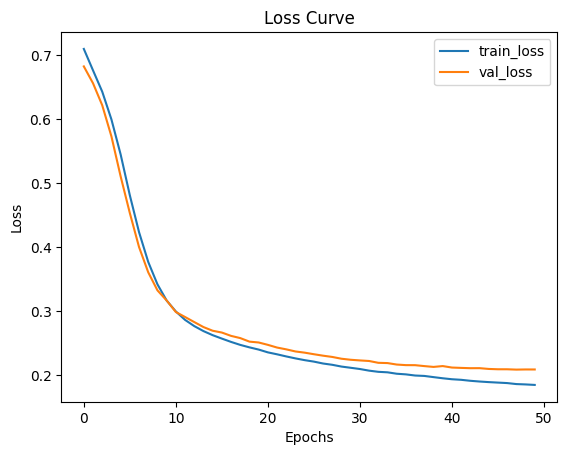

In [8]:
# Instance 2: Adam optimizer, no regularization, no early stopping
model2, hist2 = define_model(optimizer='adam', regularizer=None, early_stop=False, name='model_instance_2')
loss_curve_plot(hist2)


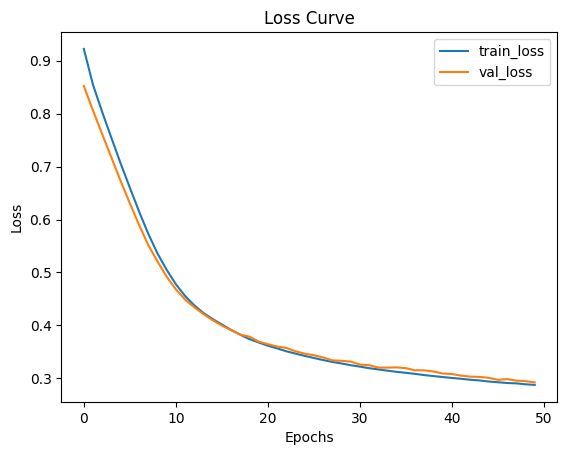

In [9]:
# Instance 3: RMSProp optimizer, L2 regularization, early stopping
model3, hist3 = define_model(optimizer='rmsprop', regularizer='l2', early_stop=True, name='model_instance_3')
loss_curve_plot(hist3)


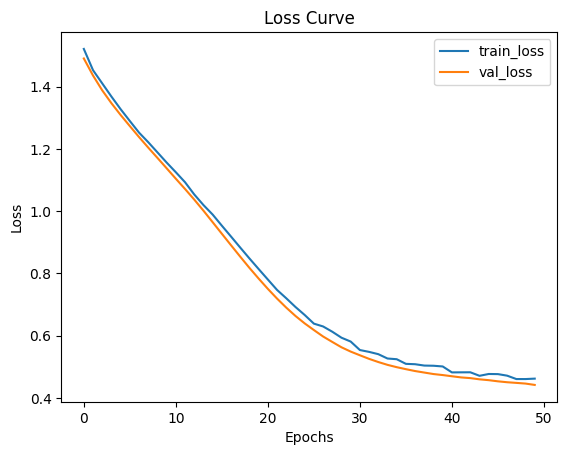

In [10]:
# Instance 4: Adam optimizer, L1 regularization, dropout, early stopping
model4, hist4 = define_model(optimizer='adam', regularizer='l1', dropout=True, early_stop=True, layers=3, lr=0.0005, name='model_instance_4')
loss_curve_plot(hist4)


#Task: Make Predictions using the best saved model


Create a confusion Matrix and F1 score for both Models. Ensure outputs for the cells are visible

Finally, Make predictions using the best model. By the time you get to this cell you may realise at some point you needed to save the model so that you cal load it later

In [11]:
def make_predictions(model_path, X):
    model = load_model(model_path)
    y_pred = (model.predict(X) > 0.5).astype(int)
    return y_pred


In [12]:
model_path = '/mnt/data/saved_models/model_instance_4.h5'
y_pred = make_predictions(model_path, X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Accuracy: 0.9253731343283582
F1 Score: 0.9261083743842364
Precision: 0.9494949494949495
Recall: 0.9038461538461539
Confusion Matrix:
 [[92  5]
 [10 94]]


Congratulations!!
